#Suicide Numbers Prediction

*Authors:* 

-   Abouda Khmayes

-   Beltaief Nader

-   Gherissi Wissam

-   Zadem Mehdi

This starting kit requires the following dependencies:



*   sklearn
*   pandas
*   numpy
*   matplotlib
*   seaborn
*   

You can install all requisite modules with pip install -r requirements.txt

In addition, ramp-workflow is needed. This can be installed from the master branch on GitHub:

python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

# General Outline

1. Introduction

2. Exploratory Data Analysis

3. Workflow

4. Local testing before submission

#1- Introduction

Since the 1900s, sociologists have been studying the intriguing phenomenon of suicide. Multiple studies have been published concerning this subject. Each study uses different features trying to understand the major causes of suicide. In our case, we want to conduct a statistical study of this happenening introducing some indicators that may have influence over the evolution of suicide rates over the years. Innovation in machine learning may allow us to have a deeper insight about suicide rates per country or per generation in order to put in devise strategies that target the categories of people more likely to commit suicide.


##1-1 Data Description
The data that we work on here is gathered from different sources. We merge two datasets : "Suicide Rates Overview 1985 to 2016
" and "country to continent". The final dataset is composed of x observations and y features. Our goal is to predict the suicide rate, i.e the number of suicides per 100,000 population.
Each row is a suicide rate and each column is a feature of this rate: sex, age, country, population and year.

##1-2 Features
The data is a bit dirty and contains missing values. It has both categorical and numerical features. 

##1-3 KPI and metric
The aim of this project is mainly to build a robust model to provide a prediction for suicide numbers given different key features and diveded per age group and country. The usefulness of this work derives from the urgency that suicide poses as a social phenomenon.
Such a model would provide for each country an estimate of how high suicide rates can be per age group. This allows for preventive measures to be taken to address the issue. The extensive features collected in this dataset would allow for more flexibility for the model: each party can set the values it can achieve and eventually it will be easier to know which policies work best when trying to prevent suicide.

An elaborate metric must be chosen in order to asses the quality of the predictions provided by the model.
Seeing that this challenge tackles a delicate and urgent issue, it would be preferable to favor a more precise estimation for high suicide rates where it is important to be aware of the problem and prepare the necessary measure to prevent it.


##2 Exploratory Data Analysis

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
from matplotlib.colors import LogNorm

In [0]:
# Upload data set.
from google.colab import files
uploaded = files.upload()


Saving countryContinent.csv to countryContinent.csv


In [0]:
import io
suicide = io.BytesIO(uploaded['train(3).csv'])


In [0]:
import pandas as pd   
suicide = pd.read_csv(suicide)


In [0]:
suicide.sort_values(by='suicides/100k pop',ascending= False).head(6)

KeyError: ignored

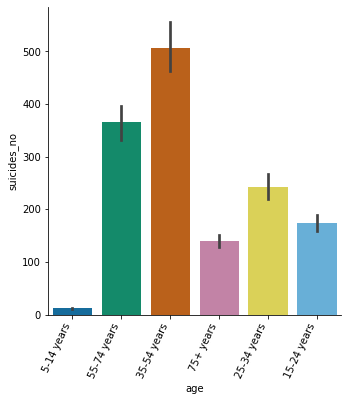

In [0]:
import seaborn as sns
chart=sns.catplot(data=suicide, x='age', y='suicides_no', kind='bar')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

In [0]:
suicide.head(6)

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Hungary,2002,female,5-14 years,3,570215,Hungary2002,NaN,"67,716,887,203",6995,Millenials,Europe
1,Slovenia,1996,male,5-14 years,2,131300,Slovenia1996,NaN,"21,480,023,017",11346,Millenials,Europe
2,Jamaica,2004,male,55-74 years,1,135519,Jamaica2004,NaN,"10,150,978,155",4119,Silent,Americas
3,Thailand,2015,female,35-54 years,363,10646859,Thailand2015,NaN,"401,399,422,443",6552,Generation X,Asia
4,Colombia,2009,female,75+ years,3,574080,Colombia2009,NaN,"233,821,670,544",5643,Silent,Americas
5,Bosnia and Herzegovina,2011,male,25-34 years,1,252743,Bosnia and Herzegovina2011,0.724,"18,644,723,861",5076,Millenials,Europe


In [0]:
suicide.head(6)

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Hungary,2002,female,5-14 years,3,570215,Hungary2002,NaN,"67,716,887,203",6995,Millenials,Europe
1,Slovenia,1996,male,5-14 years,2,131300,Slovenia1996,NaN,"21,480,023,017",11346,Millenials,Europe
2,Jamaica,2004,male,55-74 years,1,135519,Jamaica2004,NaN,"10,150,978,155",4119,Silent,Americas
3,Thailand,2015,female,35-54 years,363,10646859,Thailand2015,NaN,"401,399,422,443",6552,Generation X,Asia
4,Colombia,2009,female,75+ years,3,574080,Colombia2009,NaN,"233,821,670,544",5643,Silent,Americas
5,Bosnia and Herzegovina,2011,male,25-34 years,1,252743,Bosnia and Herzegovina2011,0.724,"18,644,723,861",5076,Millenials,Europe


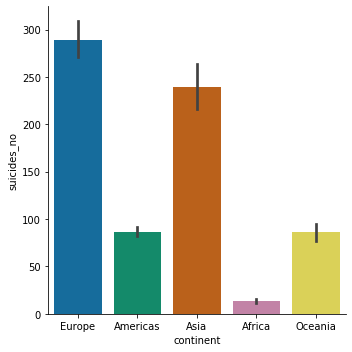

In [0]:
sns.catplot(data=suicide, x='continent', y='suicides_no', kind='bar')

<Figure size 1080x1080 with 0 Axes>

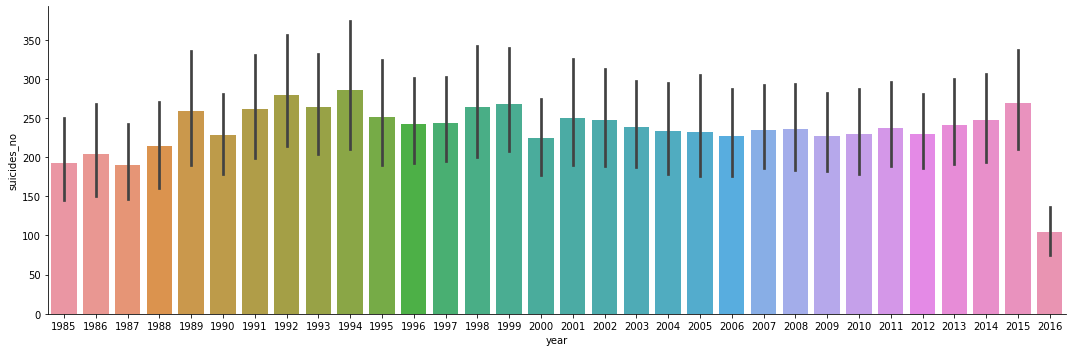

In [0]:
plt.figure(figsize=(15,15))
sns.catplot(data=suicide, x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in the world (mean over countries)")

In [0]:
suicide['country'].unique()

array(['Hungary', 'Slovenia', 'Jamaica', 'Thailand', 'Colombia',
       'Bosnia and Herzegovina', 'Switzerland', 'Seychelles', 'Belgium',
       'Kuwait', 'Serbia', 'Qatar', 'Portugal',
       'Saint Vincent and Grenadines', 'Greece', 'Luxembourg',
       'South Africa', 'Uzbekistan', 'Oman', 'Czech Republic', 'Aruba',
       'Saint Lucia', 'Romania', 'Saint Kitts and Nevis', 'Armenia',
       'Suriname', 'Ukraine', 'New Zealand', 'Albania', 'Uruguay', 'Fiji',
       'Georgia', 'Italy', 'Puerto Rico', 'Russian Federation',
       'United States', 'Chile', 'Latvia', 'Netherlands', 'Kazakhstan',
       'Japan', 'Israel', 'Belarus', 'Grenada', 'San Marino',
       'Montenegro', 'Malta', 'Australia', 'Bahamas', 'Paraguay',
       'Turkmenistan', 'Barbados', 'Mauritius', 'Brazil', 'Azerbaijan',
       'Guyana', 'Cuba', 'Estonia', 'Iceland', 'Canada', 'Germany',
       'Sri Lanka', 'El Salvador', 'Spain', 'Norway', 'Mexico',
       'Bulgaria', 'Trinidad and Tobago', 'Guatemala', 'Turkey',
  

Text(0.5, 1, 'Evolution of the Number of suicides')

<Figure size 1080x1080 with 0 Axes>

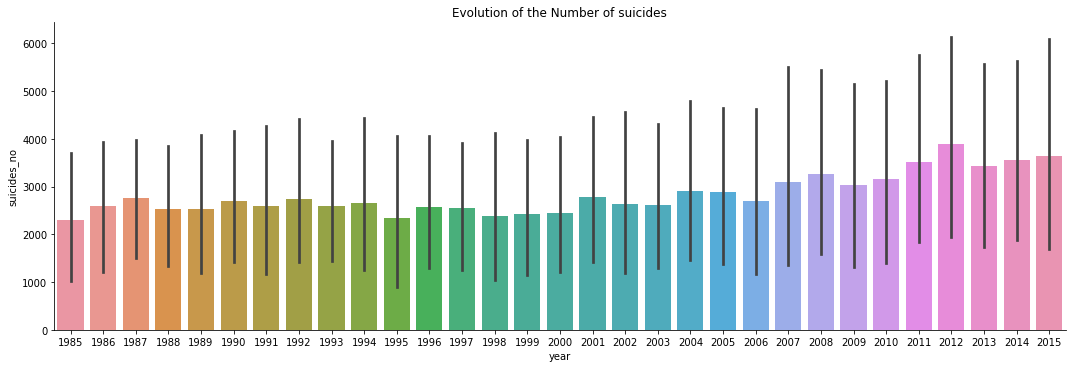

In [0]:
plt.figure(figsize=(15,15))
chart=sns.catplot(data=suicide[suicide['country']=='United States'], x='year', y='suicides_no',kind='bar',height=5,aspect=3)

plt.title("Evolution of the Number of suicides in the U.S.")

<Figure size 1080x1080 with 0 Axes>

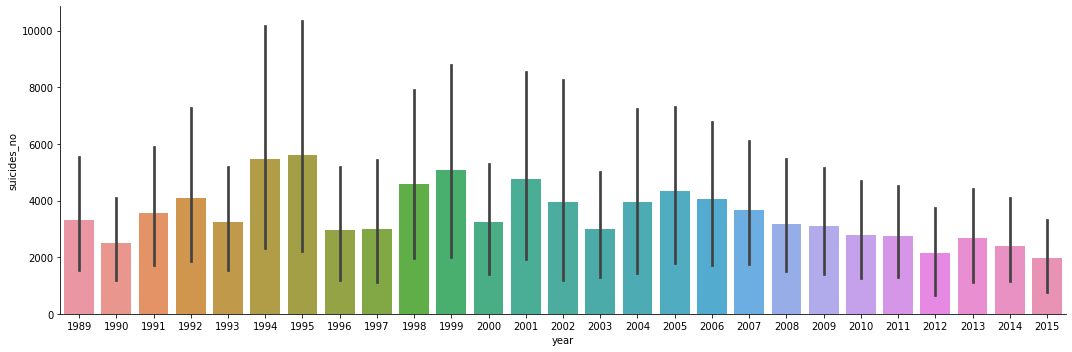

In [0]:
plt.figure(figsize=(15,15))
sns.catplot(data=suicide[suicide['country']=='Russian Federation'], x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in Russia")

In [0]:
X = suicide.groupby(['year'])[['suicides_no','year']].mean()


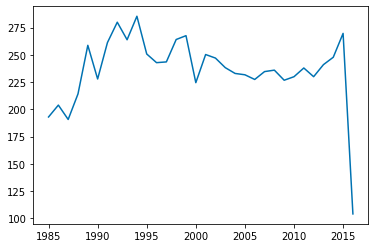

In [0]:
plt.plot(X['year'].values,X['suicides_no'].values)

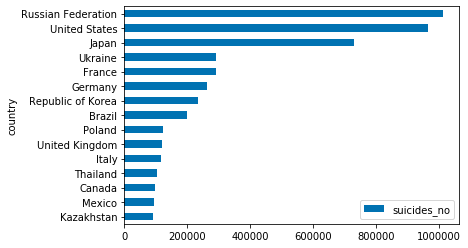

In [0]:
suicide.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).plot(x='country',y='suicides_no',kind='barh')


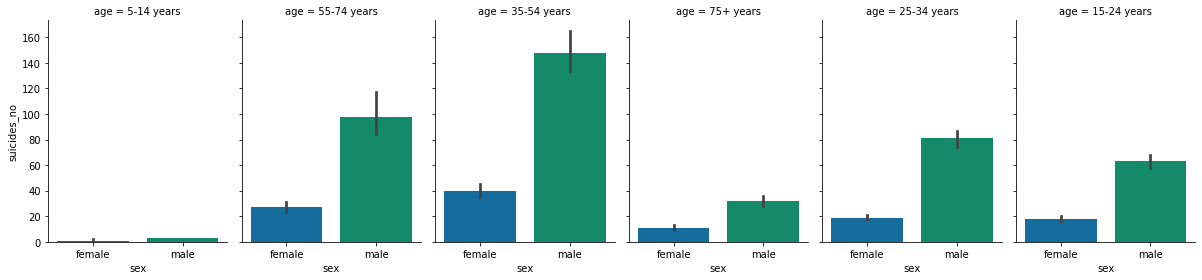

In [0]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=suicide, estimator=np.median,height=4, aspect=.7,kind='bar')



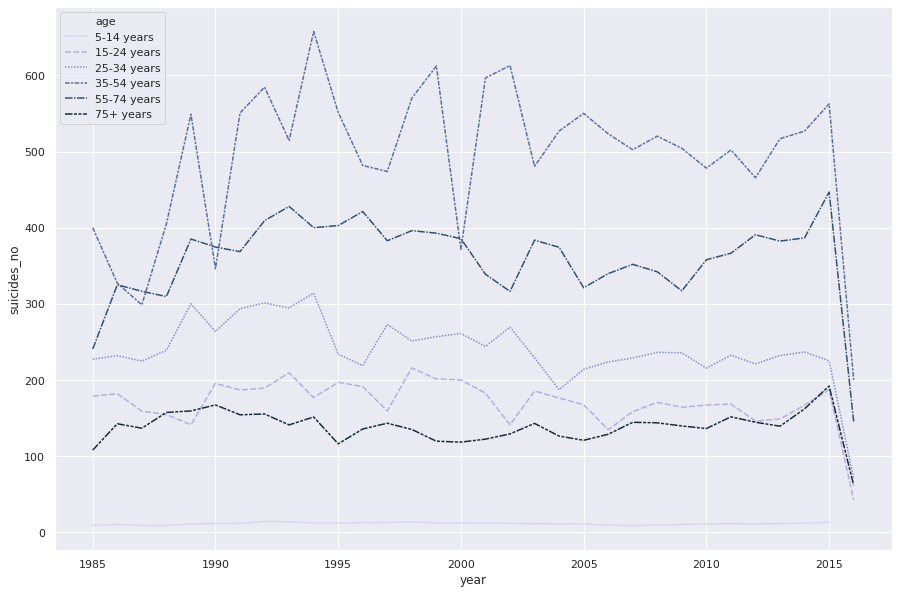

In [0]:
df = suicide.groupby(['year','age']).suicides_no.mean().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)


In [0]:
suicide['age'].unique()

array(['5-14 years', '55-74 years', '35-54 years', '75+ years',
       '25-34 years', '15-24 years'], dtype=object)

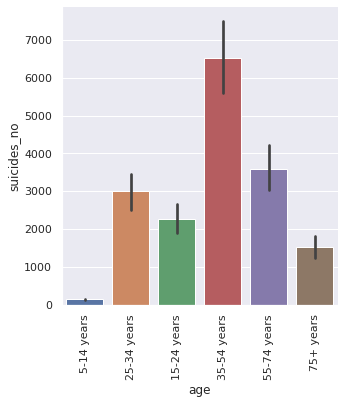

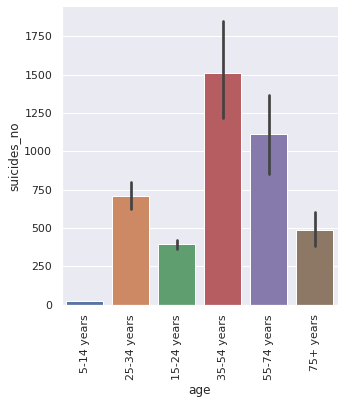

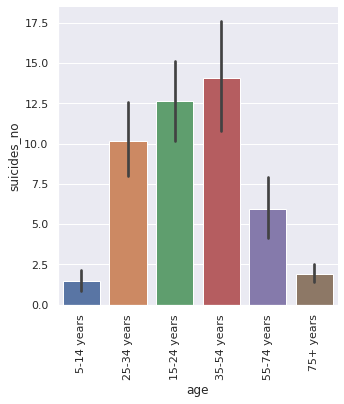

In [0]:

g=sns.catplot(data=suicide[suicide['country']=='United States'], x='age', y='suicides_no', kind='bar',order=['5-14 years', '25-34 years', '15-24 years', '35-54 years','55-74 years', '75+ years']).set_xticklabels(rotation=90)


sns.catplot(data=suicide[suicide['country']=='Republic of Korea'], x='age', y='suicides_no', kind='bar',order=['5-14 years', '25-34 years', '15-24 years', '35-54 years','55-74 years', '75+ years']).set_xticklabels(rotation=90)

g= sns.catplot(data=suicide[suicide['country']=='Albania'], x='age', y='suicides_no', kind='bar',order=['5-14 years', '25-34 years', '15-24 years', '35-54 years','55-74 years', '75+ years']).set_xticklabels(rotation=90)



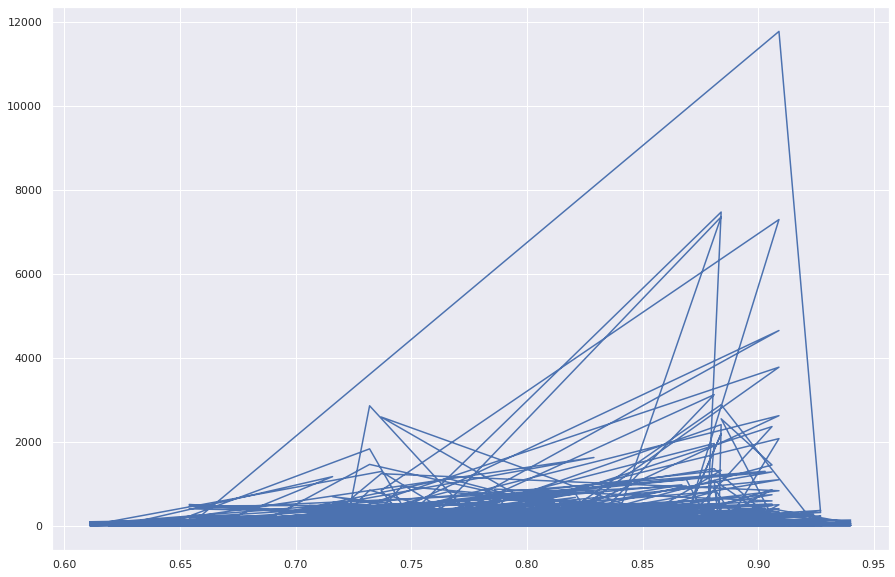

In [0]:
plt.plot(suicide[suicide['year']==2010]['HDI for year'].values,suicide[suicide['year']==2010]['suicides_no'].values)

##3- Workflow
The task in this challenge is to predict suicide rates for a given year, country, gender and generation along with indicators such as HDI (Human Development Index) and GDP (Gross Domestic Product) as accurately as possible. This is a regression task, with the constraint that the predictions must be integers.

For submitting at the RAMP site, we will use two classes, saved in two different files:

- a class FeatureExtractor, which will be used to extract features from the dataset for the regression task
- a class Regressor to predict the outputs 

![Workflow](https://drive.google.com/uc?id=1Z-_db0rbPcfbK2fhuNzN6vJrUlKJC4qo)


##3-1 Feature Extractor

In [0]:
###Preprocessor and Feature extractor

In [0]:
numeric_cols = [c for c in suicide if suicide[c].dtype.kind in ('i', 'f')]
categorical_cols = [c for c in suicide if suicide[c].dtype.kind not in ('i', 'f')]
drop_cols = ['country-year']

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

numeric_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

cat_encoder = make_column_transformer((OrdinalEncoder(), categorical_cols), remainder='passthrough')

In [0]:
from sklearn.preprocessing import FunctionTransformer

def process_gdp_for_year(X):
    gdp = X[' gdp_for_year ($)'].str[:-12]
    return pd.to_numeric(gdp, errors='coerce').values[:, np.newaxis]

gdp_year_transformer = FunctionTransformer(process_gdp_for_year, validate=False)
    

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

ct = ColumnTransformer(
    transformers=[('numeric', numeric_transformer, numeric_cols),
                  ('categoric', cat_encoder, categorical_cols),
                  ('gdpforyear', gdp_year_transformer,['gdp_for_year ($)']),
                  ('drop cols', 'drop', drop_cols),
                 ])


##3-2 Baseline Regressor

In [0]:
###Regressor

##4- Local testing before submission

It is important that you test your submission files before submitting them. For this we provide a unit test. Note that the test runs on your files in submissions/starting_kit, not on the classes defined in the cells of this notebook.

Start install the **ramp-workflow** packages unsing "pip install" or directly from the GitHub repository.

    pip install ramp-workflow

Then you can run

    ramp_test_submission --submission starting_kit

If it runs and print training and test errors on each fold, then you can submit the code.

In [0]:
!ramp_test_submission --submission starting_kit